In [474]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

In [475]:
# Abrir el archivo de log y leer todas las líneas
with open('wpsSimulator.log', 'r') as f:
    lines = f.readlines()

# Filtrar las líneas que contienen "PeasantFamilyBDIAgentBelieves"
filtered_lines = [line for line in lines if "PeasantFamilyBDIAgentBelieves" in line]

# Crear una lista de diccionarios a partir de las líneas filtradas
data = []
for line in filtered_lines:
    # Extraer el valor de 'peasantProfile'
    peasant_profile_start = line.find('PeasantFamily_')
    peasant_profile_end = line.find(' ', peasant_profile_start)
    peasant_profile = line[peasant_profile_start:peasant_profile_end]

    # Extraer la información entre las llaves {}
    start_index = line.find('{') + 1
    end_index = line.rfind('}')
    info = line[start_index:end_index]

    # Dividir la información en pares clave-valor
    pairs = info.split(', ')
    row_dict = {}
    for pair in pairs:
        if '=' in pair:
            # Dividir en el primer signo igual '=' encontrado
            key, value = pair.split('=', 1)
            row_dict[key] = value

    data.append(row_dict)

# Crear un DataFrame de Pandas a partir de la lista de diccionarios
df = pd.DataFrame(data)

In [476]:
# Cambiar el nombre de la columna
df = df.rename(columns={'PeasantFamilyBDIAgentBelieves{peasantProfile': 'peasantProfile'})
# Limpia las columnas vacias
df = df.dropna(subset=['peasantProfile'])

In [477]:
df

,peasantProfile,peasantEmotionalState,currentSeason,currentCropCare,roberyAccount,ptwDate,currentMoneyOrigin,currentPeasantActivityType,currentPeasantLeisureType,currentResourceNeededType,...,leisureOptions,sellDone,waterAvailable,pesticidesAvailable,supplies,riceSeedsByHectare,harvestedWeight,startRiceSeason,endRiceSeason,currentCropName
98,PeasantFamily_5,[],GROWING,CHECK,0,null,NONE,NONE,WASTERESOURCE,NONE,...,1.0,false,1000,0,1,20,0,03/01/2022,30/05/2022,ñame
99,PeasantFamily_4,[],NONE,NONE,0,null,LOAN,NONE,LEISURE,null,...,1.0,false,500,0,1,20,0,15/01/2022,30/05/2022,ñame
100,PeasantFamily_2,[],GROWING,CHECK,0,null,NONE,NONE,LEISURE,NONE,...,1.0,false,1000,0,1,20,0,03/01/2022,30/05/2022,ñame
101,PeasantFamily_3,[],GROWING,CHECK,0,null,NONE,NONE,LEISURE,NONE,...,1.0,false,1000,0,1,20,0,04/01/2022,30/05/2022,ñame
102,PeasantFamily_1,[],GROWING,CHECK,0,null,NONE,NONE,LEISURE,NONE,...,1.0,false,1000,0,1,20,0,03/01/2022,30/05/2022,ñame
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229,PeasantFamily_1,[],NONE,NONE,0,01/11/2022,LOAN,PTW,NONE,NONE,...,1.0,false,470,0,1,20,0,03/01/2022,30/05/2022,ñame
5230,PeasantFamily_2,[],NONE,NONE,0,06/11/2022,LOAN,PTW,NONE,NONE,...,1.0,false,470,0,1,20,0,03/01/2022,30/05/2022,ñame
5231,PeasantFamily_5,[],NONE,NONE,0,03/11/2022,LOAN,PTW,NONE,NONE,...,1.0,false,450,0,1,20,0,03/01/2022,30/05/2022,ñame
5232,PeasantFamily_4,[],GROWING,NONE,0,01/02/2022,LOAN,PTW,NONE,null,...,1.0,false,450,0,1,20,0,15/01/2022,30/05/2022,ñame


In [478]:
df.describe()

,peasantProfile,peasantEmotionalState,currentSeason,currentCropCare,roberyAccount,ptwDate,currentMoneyOrigin,currentPeasantActivityType,currentPeasantLeisureType,currentResourceNeededType,...,leisureOptions,sellDone,waterAvailable,pesticidesAvailable,supplies,riceSeedsByHectare,harvestedWeight,startRiceSeason,endRiceSeason,currentCropName
count,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320,...,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320
unique,5,1,2,3,1,5,2,2,3,2,...,1,1,46,1,1,1,1,3,1,1
top,PeasantFamily_5,[],NONE,NONE,0,null,NONE,NONE,NONE,NONE,...,1.0,false,450,0,1,20,0,03/01/2022,30/05/2022,ñame
freq,264,1320,869,1145,1320,882,812,882,570,1056,...,1320,1320,483,1320,1320,1320,1320,792,1320,1320


In [479]:
df.columns

Index(['peasantProfile', 'peasantEmotionalState', 'currentSeason',
       'currentCropCare', 'roberyAccount', 'ptwDate', 'currentMoneyOrigin',
       'currentPeasantActivityType', 'currentPeasantLeisureType',
       'currentResourceNeededType', 'currentDay', 'timeLeftOnDay', 'newDay',
       'weekBlock', 'busy', 'internalCurrentDate', 'priceList', 'seeds',
       'livestock', 'ñame', 'water', 'tools', 'peasantKind', 'purpose',
       'peasantFamilyMinimalVital', 'health', 'productivity', 'wellBeging',
       'worker', 'peasantQualityFactor', 'liveStockAffinity', 'farm',
       'cropSize', 'housing', 'servicesPresence', 'housingSize',
       'housingCondition', 'housingLocation', 'farmDistance', 'money',
       'totalIncome', 'loanAmountToPay', 'housingQuailty',
       'timeSpentOnMaintenance', 'cropHealth', 'farmReady',
       'harvestedWeightExpected', 'processedCrop', 'cropEficiency',
       'processedWeight', 'processingTime', 'trainingLevel',
       'trainingAvailability', 'trainin

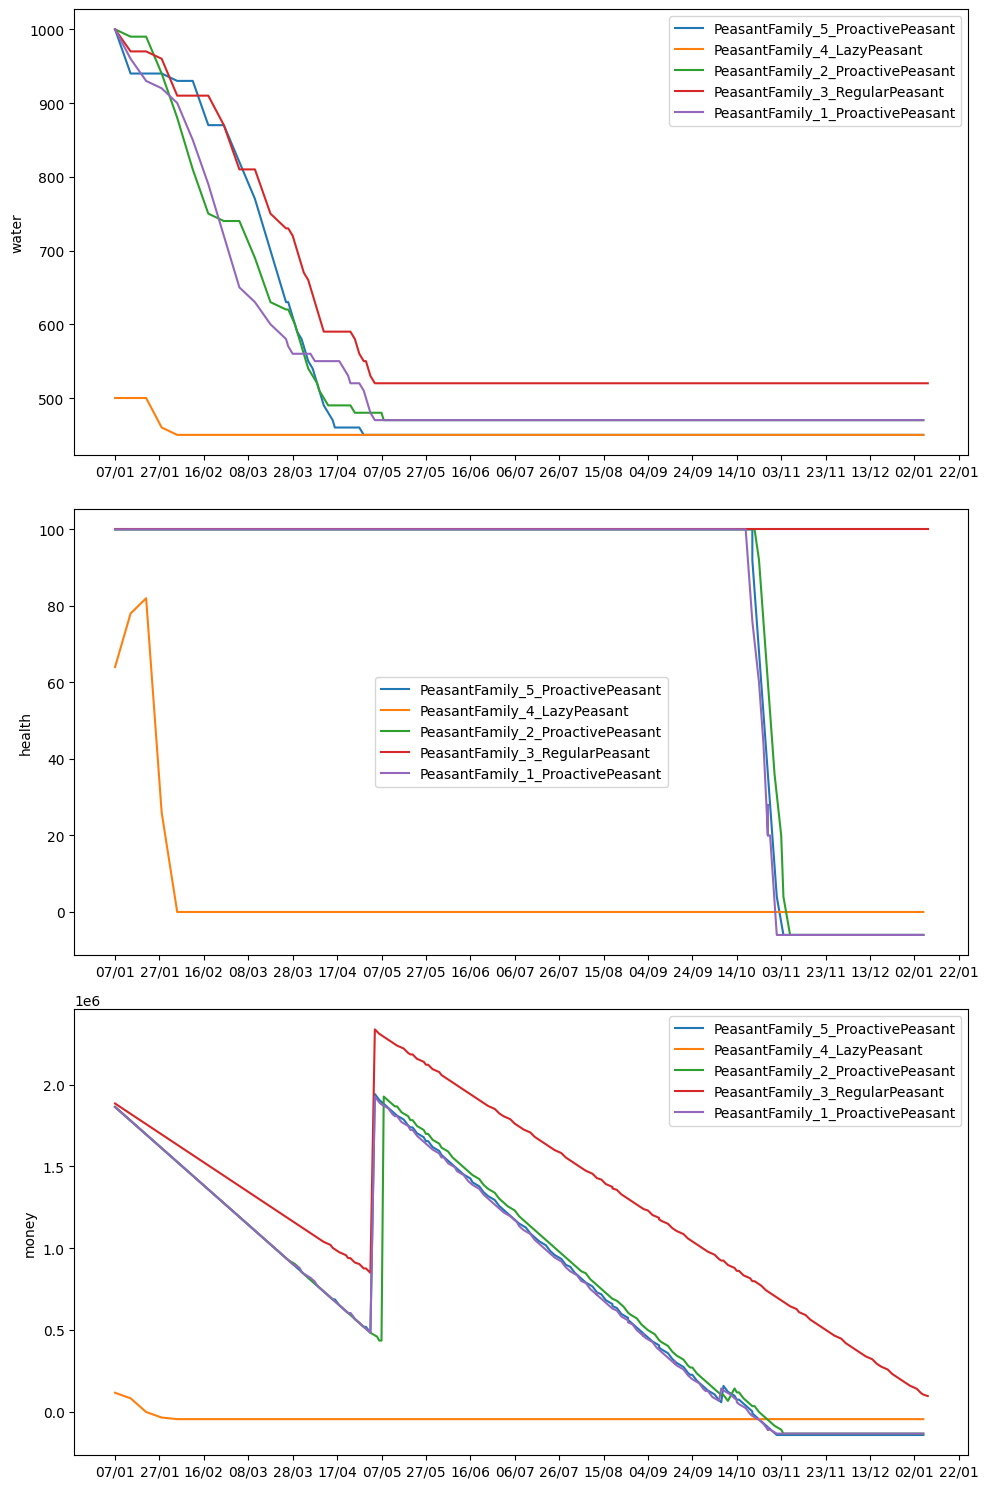

In [480]:
# Asegurando que 'internalCurrentDate' sea una fecha
df['internalCurrentDate'] = pd.to_datetime(df['internalCurrentDate'], dayfirst=True)

# Convirtiendo las columnas a formato numérico
df['water'] = pd.to_numeric(df['waterAvailable'], errors='coerce')
df['health'] = pd.to_numeric(df['health'], errors='coerce')
df['money'] = pd.to_numeric(df['money'], errors='coerce')

# Combinar las columnas 'peasantProfile' y 'peasantKind' en una nueva columna 'label'
df['label'] = df['peasantProfile'] + '_' + df['peasantKind']

# Crear una lista de todos los 'label' únicos
labels = df['label'].unique()

# Crear un conjunto de subgráficos (3 filas, 1 columna)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Para cada variable ('water', 'health', 'money'), crear un gráfico de línea por 'label'
for ax, column in zip(axs, ['water', 'health', 'money']):
    for label in labels:
        df_label = df[df['label'] == label]
        df_label = df_label.sort_values('internalCurrentDate')
        ax.plot(df_label['internalCurrentDate'], df_label[column], label=label)
    ax.set_ylabel(column)
    ax.legend()

    # Configurar el número de fechas a mostrar en el eje x
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

# Ajustar la presentación
plt.tight_layout()
plt.show()
